In [2]:
import sys
#sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)

['/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python38.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/extensions', '/scratch/antoniov/.ipython']


In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

# test_sample_ratio = 0.40

Welcome to JupyROOT 6.24/00
{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


In [15]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = [
    "data-random-resample_50-single-arm-2017B",
#     "data-random-resample_50-single-arm-2017C",
#     "data-random-resample_50-single-arm-2017D",
#     "data-random-resample_50-single-arm-2017E",
#     "data-random-resample_50-single-arm-2017F"
]
fileNames_bkg = {
    "data-random-resample_50-single-arm-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
#     "data-random-resample_50-single-arm-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
#     "data-random-resample_50-single-arm-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
#     "data-random-resample_50-single-arm-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
#     "data-random-resample_50-single-arm-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
}
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None

df_counts_bkg_list_ = []
df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
        df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
        df_counts_bkg_list_.append( df_counts_bkg__ )
        df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )

{'data-random-resample_50-single-arm-2017B': 'output/data-store-data-random-resample_50-single-arm-2017B.h5'}
data-random-resample_50-single-arm-2017B
output/data-store-data-random-resample_50-single-arm-2017B.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [16]:
df_protons_multiRP_bkg_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event     slice                                       
297101 489       649856256 0              140.0       0.4   6.621413   
297050 476       580449216 0              140.0       0.4   5.757312   
       549       661334464 0              140.0       0.4   5.576218   
297411 315       507676576 0              150.0       0.4  10.520432   
       316       508349216 0              150.0       0.4  10.515504   
...                                         ...       ...        ...   
297429 4         5327716   49             150.0       0.4  10.934103   
297178 111       155450912 49             140.0       0.4   7.815561   
297292 373       670544576 49             140.0       0.4  10.361115   
       361       648401472 49             140.0       0.4  10.418368   
       383       689631296 49             140.0       0.4  10.300518   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
297101 489       649856256 0      260.342468  0.901040 -1.733695   377.446045   
297050 476       580449216 0      206.656708 -1.669699 -1.594690   572.327148   
       549       661334464 0      221.260986  0.161510  2.070358   230.003281   
297411 315       507676576 0      303.093658 -0.904305  0.451934   444.836426   
       316       508349216 0      236.744904 -1.145817  2.867361   415.384155   
...                                      ...       ...       ...          ...   
297429 4         5327716   49     280.670258 -0.495451 -0.959207   324.568054   
297178 111       155450912 49     289.189484 -1.681892 -2.310596   812.097839   
297292 373       670544576 49     226.654419  0.283741  2.915332   239.831909   
       361       648401472 49     278.358917  0.510766  2.678027   325.851410   
       383       689631296 49     216.322632  1.715227 -0.418429   622.344910   

                                  jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                       ...   
297101 489       649856256 0      12.330968      13.377403   0.126621  ...   
297050 476       580449216 0      52.257484      57.996189   0.221515  ...   
       549       661334464 0      11.784620      12.678056   0.125612  ...   
297411 315       507676576 0      59.398434      64.273888   0.241436  ...   
       316       508349216 0      25.581654      28.535761   0.226026  ...   
...                                     ...            ...        ...  ...   
297429 4         5327716   49     44.361031      47.851521   0.251477  ...   
297178 111       155450912 49     84.035065      92.829346   0.313931  ...   
297292 373       670544576 49     14.554245      15.651324   0.117502  ...   
       361       648401472 49     30.451456      32.720905   0.242368  ...   
       383       689631296 49     25.556046      28.610872   0.164934  ...   

                                           MX        YX  diffMWW_MX  \
run    lumiblock event     slice                                      
297101 489       649856256 0      1094.381470 -0.123946 -515.642151   
297050 476       580449216 0       897.169678 -0.648630 -460.306305   
       549       661334464 0      1144.074829  0.052112 -787.213135   
297411 315       507676576 0       929.553772  0.302069 -350.964600   
       316       508349216 0      1503.171631  0.001448 -978.543518   
...                                       ...       ...         ...   
297429 4         5327716   49     1235.605103  0.010439 -680.395386   
297178 111       155450912 49     1112.919067 -0.128800 -695.426697   
297292 373       670544576 49      788.474121  0.175653 -290.737549   
       361       648401472 49      920.712646  0.002972 -273.823669   
       383       689631296 49      981.550537  0.399787 -570.754761   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event 

In [4]:
df_protons_multiRP_bkg_index.columns

Index(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta', 'jet0_phi',
       'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2',
       'jet0_vertexz', 'jet0_px', 'jet0_py', 'jet0_pz', 'muon0_pt',
       'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep',
       'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicEta',
       'WLeptonicPhi', 'run_rnd', 'lumiblock_rnd', 'event_rnd',
       'crossingAngle_rnd', 'betaStar_rnd', 'trackx1', 'tracky1',
       'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2',
       'rpid2', 'period', 'jet0_pt_nom', 'jet0_energy_nom', 'jet0_mass_nom',
       'jet0_corrmass_nom', 'jet0_px_nom', 'jet0

In [5]:
df_protons_multiRP_bkg_index
# df_protons_multiRP_bkg_index[ [ 'period', 'crossingAngle', 'betaStar', 'instLumi', 'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'betaStar_rnd' ] ]

crossingAngle  betaStar  instLumi  \
run    lumiblock event      slice                                      
297050 56        67470672   0              150.0       0.4  6.679657   
       377       470990080  0              150.0       0.4  5.848127   
                 471850816  0              150.0       0.4  5.848127   
297101 216       302789152  0              150.0       0.4  7.221645   
                 303382496  0              150.0       0.4  7.221645   
...                                          ...       ...       ...   
297292 688       1232281344 49             130.0       0.4  9.318492   
                 1231198848 49             130.0       0.4  9.318492   
297293 11        15942599   49             130.0       0.4  8.998219   
                 16607421   49             130.0       0.4  8.998219   
                 16079379   49             130.0       0.4  8.998219   

                                         xi       thx       thy         t  \
run    lumiblock event      slice                                           
297050 56        67470672   0      0.077311  0.000018 -0.000071 -0.214115   
       377       470990080  0      0.086854 -0.000035  0.000050 -0.150281   
                 471850816  0      0.054541  0.000023 -0.000065 -0.189605   
297101 216       302789152  0      0.060611 -0.000024  0.000048 -0.120101   
                 303382496  0      0.030544  0.000023 -0.000158 -1.044308   
...                                     ...       ...       ...       ...   
297292 688       1232281344 49     0.045353  0.000123 -0.000128 -1.278293   
                 1231198848 49     0.111953 -0.000052  0.000012 -0.120729   
297293 11        15942599   49     0.044560 -0.000002 -0.000090 -0.326372   
                 16607421   49     0.048124 -0.000031  0.000039 -0.100401   
                 16079379   49     0.082607 -0.000079 -0.000080 -0.492984   

                                   ismultirp  rpid  arm  ...      MWW_nom  \
run    lumiblock event      slice                        ...                
297050 56        67470672   0              1   123    1  ...   405.385406   
       377       470990080  0              1    23    0  ...   652.338989   
                 471850816  0              1   123    1  ...   523.850037   
297101 216       302789152  0              1    23    0  ...  1327.643677   
                 303382496  0              1   123    0  ...   361.387268   
...                                      ...   ...  ...  ...          ...   
297292 688       1232281344 49             1    23    0  ...   326.568909   
                 1231198848 49             1    23    0  ...   943.133606   
297293 11        15942599   49             1    23    0  ...   362.049225   
                 16607421   49             1   123    1  ...   357.398956   
                 16079379   49             1   123    1  ...   382.177490   

                                    YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event      slice                                         
297050 56        67470672   0      0.378670      0.045744      0.020410   
       377       470990080  0     -1.204999      0.012874      0.170092   
                 471850816  0      0.549820      0.069691      0.022490   
297101 216       302789152  0     -0.157367      0.086781      0.119188   
                 303382496  0      0.958147      0.099600      0.012715   
...                                     ...           ...           ...   
297292 688       1232281344 49     1.509179      0.120860      0.004939   
                 1231198848 49    -0.429726      0.046605      0.110990   
297293 11        15942599   49    -0.538398      0.013715      0.048130   
                 16607421   49     0.171376      0.032002      0.022127   
                 16079379   49    -0.674725      0.014323      0.060245   

                                     xi_nom  within_aperture   xlow   xhigh  \
run    lumiblock event      slice      

In [6]:
df_protons_multiRP_bkg_newindex = df_protons_multiRP_bkg_index.reset_index().set_index( [ 'run', 'lumiblock', 'event' ] )
df_protons_multiRP_bkg_newindex

slice  crossingAngle  betaStar  instLumi  \
run    lumiblock event                                                  
297050 56        67470672        0          150.0       0.4  6.679657   
       377       470990080       0          150.0       0.4  5.848127   
                 471850816       0          150.0       0.4  5.848127   
297101 216       302789152       0          150.0       0.4  7.221645   
                 303382496       0          150.0       0.4  7.221645   
...                            ...            ...       ...       ...   
297292 688       1232281344     49          130.0       0.4  9.318492   
                 1231198848     49          130.0       0.4  9.318492   
297293 11        15942599       49          130.0       0.4  8.998219   
                 16607421       49          130.0       0.4  8.998219   
                 16079379       49          130.0       0.4  8.998219   

                                   xi       thx       thy         t  \
run    lumiblock event                                                
297050 56        67470672    0.077311  0.000018 -0.000071 -0.214115   
       377       470990080   0.086854 -0.000035  0.000050 -0.150281   
                 471850816   0.054541  0.000023 -0.000065 -0.189605   
297101 216       302789152   0.060611 -0.000024  0.000048 -0.120101   
                 303382496   0.030544  0.000023 -0.000158 -1.044308   
...                               ...       ...       ...       ...   
297292 688       1232281344  0.045353  0.000123 -0.000128 -1.278293   
                 1231198848  0.111953 -0.000052  0.000012 -0.120729   
297293 11        15942599    0.044560 -0.000002 -0.000090 -0.326372   
                 16607421    0.048124 -0.000031  0.000039 -0.100401   
                 16079379    0.082607 -0.000079 -0.000080 -0.492984   

                             ismultirp  rpid  ...      MWW_nom   YWW_nom  \
run    lumiblock event                        ...                          
297050 56        67470672            1   123  ...   405.385406  0.378670   
       377       470990080           1    23  ...   652.338989 -1.204999   
                 471850816           1   123  ...   523.850037  0.549820   
297101 216       302789152           1    23  ...  1327.643677 -0.157367   
                 303382496           1   123  ...   361.387268  0.958147   
...                                ...   ...  ...          ...       ...   
297292 688       1232281344          1    23  ...   326.568909  1.509179   
                 1231198848          1    23  ...   943.133606 -0.429726   
297293 11        15942599            1    23  ...   362.049225 -0.538398   
                 16607421            1   123  ...   357.398956  0.171376   
                 16079379            1   123  ...   382.177490 -0.674725   

                             xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                              
297050 56        67470672        0.045744      0.020410  0.077311   
       377       470990080       0.012874      0.170092  0.086854   
                 471850816       0.069691      0.022490  0.054541   
297101 216       302789152       0.086781      0.119188  0.060611   
                 303382496       0.099600      0.012715  0.030544   
...                                   ...           ...       ...   
297292 688       1232281344      0.120860      0.004939  0.045353   
                 1231198848      0.046605      0.110990  0.111953   
297293 11        15942599        0.013715      0.048130  0.044560   
                 16607421        0.032002      0.022127  0.048124   
                 16079379        0.014323      0.060245  0.082607   

                             within_aperture   xlow   xhigh    ylow  yhigh  
run    lumiblock event                                                      
297050 56        67470672               True  2.422  24.620  -9.698  4.698  
       377       470990080           

In [7]:
df_protons_multiRP_bkg_arm0 = df_protons_multiRP_bkg_newindex.loc[ df_protons_multiRP_bkg_newindex.loc[ :, "arm" ] == 0 ]
df_protons_multiRP_bkg_arm0

slice  crossingAngle  betaStar   instLumi  \
run    lumiblock event                                                   
297050 377       470990080       0          150.0       0.4   5.848127   
297101 216       302789152       0          150.0       0.4   7.221645   
                 303382496       0          150.0       0.4   7.221645   
       264       366620512       0          140.0       0.4   6.993243   
                 366914624       0          140.0       0.4   6.993243   
...                            ...            ...       ...        ...   
297292 383       689631296      49          140.0       0.4  10.300518   
       472       851658432      49          140.0       0.4   9.950864   
       688       1232281344     49          130.0       0.4   9.318492   
                 1231198848     49          130.0       0.4   9.318492   
297293 11        15942599       49          130.0       0.4   8.998219   

                                   xi       thx       thy         t  \
run    lumiblock event                                                
297050 377       470990080   0.086854 -0.000035  0.000050 -0.150281   
297101 216       302789152   0.060611 -0.000024  0.000048 -0.120101   
                 303382496   0.030544  0.000023 -0.000158 -1.044308   
       264       366620512   0.076924 -0.000042  0.000100 -0.462170   
                 366914624   0.036419  0.000077  0.000018 -0.258989   
...                               ...       ...       ...       ...   
297292 383       689631296   0.112615 -0.000056 -0.000023 -0.149699   
       472       851658432   0.047044 -0.000085 -0.000089 -0.614935   
       688       1232281344  0.045353  0.000123 -0.000128 -1.278293   
                 1231198848  0.111953 -0.000052  0.000012 -0.120729   
297293 11        15942599    0.044560 -0.000002 -0.000090 -0.326372   

                             ismultirp  rpid  ...      MWW_nom   YWW_nom  \
run    lumiblock event                        ...                          
297050 377       470990080           1    23  ...   652.338989 -1.204999   
297101 216       302789152           1    23  ...  1327.643677 -0.157367   
                 303382496           1   123  ...   361.387268  0.958147   
       264       366620512           1   123  ...   790.393311 -0.708834   
                 366914624           1   103  ...   577.087891  0.410889   
...                                ...   ...  ...          ...       ...   
297292 383       689631296           1   123  ...   418.155853  1.318180   
       472       851658432           1    23  ...   465.305664  0.430878   
       688       1232281344          1    23  ...   326.568909  1.509179   
                 1231198848          1    23  ...   943.133606 -0.429726   
297293 11        15942599            1    23  ...   362.049225 -0.538398   

                             xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                              
297050 377       470990080       0.012874      0.170092  0.086854   
297101 216       302789152       0.086781      0.119188  0.060611   
                 303382496       0.099600      0.012715  0.030544   
       264       366620512       0.028262      0.121972  0.076924   
                 366914624       0.065579      0.027964  0.036419   
...                                   ...           ...       ...   
297292 383       689631296       0.121519      0.007557  0.112615   
       472       851658432       0.062749      0.024062  0.047044   
       688       1232281344      0.120860      0.004939  0.045353   
                 1231198848      0.046605      0.110990  0.111953   
297293 11        15942599        0.013715      0.048130  0.044560   

                             within_aperture   xlow   xhigh    ylow  yhigh  
run    lumiblock event                                                      
297050 377       470990080              True  1.995  24.334 -10.098  4.298  
297101 216       3027891

In [8]:
df_protons_multiRP_bkg_arm1 = df_protons_multiRP_bkg_newindex.loc[ df_protons_multiRP_bkg_newindex.loc[ :, "arm" ] == 1 ]
df_protons_multiRP_bkg_arm1

slice  crossingAngle  betaStar   instLumi  \
run    lumiblock event                                                  
297050 56        67470672       0          150.0       0.4   6.679657   
       377       471850816      0          150.0       0.4   5.848127   
297101 216       302550016      0          150.0       0.4   7.221645   
       264       366741440      0          140.0       0.4   6.993243   
       489       649856256      0          140.0       0.4   6.621413   
...                           ...            ...       ...        ...   
297292 361       648649472     49          140.0       0.4  10.418368   
       383       689631296     49          140.0       0.4  10.300518   
       472       853250368     49          140.0       0.4   9.950864   
297293 11        16607421      49          130.0       0.4   8.998219   
                 16079379      49          130.0       0.4   8.998219   

                                  xi       thx       thy         t  ismultirp  \
run    lumiblock event                                                          
297050 56        67470672   0.077311  0.000018 -0.000071 -0.214115          1   
       377       471850816  0.054541  0.000023 -0.000065 -0.189605          1   
297101 216       302550016  0.067639  0.000027 -0.000164 -1.088333          1   
       264       366741440  0.082816  0.000022  0.000044 -0.100764          1   
       489       649856256  0.095292  0.000014 -0.000006 -0.017650          1   
...                              ...       ...       ...       ...        ...   
297292 361       648649472  0.122984 -0.000100 -0.000035 -0.431136          1   
       383       689631296  0.050623  0.000010 -0.000087 -0.308683          1   
       472       853250368  0.136428  0.000024  0.000025 -0.061461          1   
297293 11        16607421   0.048124 -0.000031  0.000039 -0.100401          1   
                 16079379   0.082607 -0.000079 -0.000080 -0.492984          1   

                            rpid  ...     MWW_nom   YWW_nom  xiCMS_45_nom  \
run    lumiblock event            ...                                       
297050 56        67470672    123  ...  405.385406  0.378670      0.045744   
       377       471850816   123  ...  523.850037  0.549820      0.069691   
297101 216       302550016   123  ...  452.063477 -0.410420      0.022673   
       264       366741440   123  ...  601.208557  0.203293      0.055613   
       489       649856256   123  ...  589.839417  0.606781      0.075976   
...                          ...  ...         ...       ...           ...   
297292 361       648649472   123  ...  678.633301  0.660900      0.100225   
       383       689631296   123  ...  418.155853  1.318180      0.121519   
       472       853250368   123  ...  369.108917  0.545267      0.050302   
297293 11        16607421    123  ...  357.398956  0.171376      0.032002   
                 16079379    123  ...  382.177490 -0.674725      0.014323   

                            xiCMS_56_nom    xi_nom  within_aperture   xlow  \
run    lumiblock event                                                       
297050 56        67470672       0.020410  0.077311             True  2.422   
       377       471850816      0.022490  0.054541             True  2.422   
297101 216       302550016      0.054489  0.067639             True  2.422   
       264       366741440      0.036365  0.082816             True  2.422   
       489       649856256      0.017138  0.095292             True  2.422   
...                                  ...       ...              ...    ...   
297292 361       648649472      0.025958  0.122984             True  2.422   
       383       689631296      0.007557  0.050623             True  2.422   
       472       853250368      0.015304  0.136428             True  2.422   
297293 11        16607421       0.022127  0.048124             True  2.422   
                 16079379       0.060245  0.082607             True  2.422   

       

### Data

In [9]:
label = "data-single-arm"
base_path_ = "output"
file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
df_counts_data = None
df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
with pd.HDFStore( file_path_, 'r' ) as store_:
    print ( list( store_ ) )
    df_counts_data = store_[ "counts" ]
    df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

['/counts', '/events_multiRP', '/protons_multiRP']


In [10]:
df_protons_multiRP_data_index.columns

Index(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta', 'jet0_phi',
       'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2',
       'jet0_vertexz', 'jet0_px', 'jet0_py', 'jet0_pz', 'muon0_pt',
       'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad', 'recoMWlep',
       'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicEta',
       'WLeptonicPhi', 'trackx1', 'tracky1', 'trackpixshift1', 'rpid1',
       'trackx2', 'tracky2', 'trackpixshift2', 'rpid2', 'period',
       'jet0_pt_nom', 'jet0_energy_nom', 'jet0_mass_nom', 'jet0_corrmass_nom',
       'jet0_px_nom', 'jet0_py_nom', 'jet0_pz_nom', 'muon0_pt_nom',
       'muon0_energy_nom', 'muon0_px_nom', '

In [11]:
df_protons_multiRP_data_newindex = df_protons_multiRP_data_index.reset_index().set_index( [ 'run', 'lumiblock', 'event' ] )
df_protons_multiRP_data_newindex

slice  crossingAngle  betaStar  instLumi  \
run    lumiblock event                                                  
297050 56        67470672        0          150.0       0.4  6.679657   
                 67470672        0          150.0       0.4  6.679657   
                 67897384        0          150.0       0.4  6.679657   
                 67289640        0          150.0       0.4  6.679657   
                 68400744        0          150.0       0.4  6.679657   
...                            ...            ...       ...       ...   
306459 2038      2251110400      0          120.0       0.3  4.090506   
                 2251110400      0          120.0       0.3  4.090506   
       2039      2251811840      0          120.0       0.3  4.088757   
                 2251704832      0          120.0       0.3  4.088757   
       2044      2256075520      0          120.0       0.3  4.081435   

                                   xi       thx       thy         t  \
run    lumiblock event                                                
297050 56        67470672    0.048623 -0.000018 -0.000086 -0.313532   
                 67470672    0.046856 -0.000036 -0.000017 -0.067508   
                 67897384    0.050531  0.000025 -0.000003 -0.028292   
                 67289640    0.081959  0.000028  0.000031 -0.074366   
                 68400744    0.142235 -0.000028  0.000101 -0.417911   
...                               ...       ...       ...       ...   
306459 2038      2251110400  0.058620  0.000085 -0.000056 -0.410964   
                 2251110400  0.087298 -0.000005 -0.000096 -0.367160   
       2039      2251811840  0.048504  0.000053  0.000011 -0.118062   
                 2251704832  0.097770  0.000014  0.000038 -0.072689   
       2044      2256075520  0.040210  0.000106 -0.000098 -0.846083   

                             ismultirp  rpid  ...     MWW_nom   YWW_nom  \
run    lumiblock event                        ...                         
297050 56        67470672            1   123  ...  405.385406  0.378670   
                 67470672            1   123  ...  405.385406  0.378670   
                 67897384            1   123  ...  374.653290  1.218092   
                 67289640            1   123  ...  473.277130 -0.101464   
                 68400744            1   123  ...  776.089905  0.466197   
...                                ...   ...  ...         ...       ...   
306459 2038      2251110400          1   123  ...  478.024750  0.091838   
                 2251110400          1   123  ...  478.024750  0.091838   
       2039      2251811840          1   123  ...  799.864624  0.624587   
                 2251704832          1    23  ...  624.852051 -0.465529   
       2044      2256075520          1   123  ...  499.380920 -0.527032   

                             xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                              
297050 56        67470672        0.045744      0.020410  0.048623   
                 67470672        0.045744      0.020410  0.046856   
                 67897384        0.108300      0.006670  0.050531   
                 67289640        0.032000      0.039572  0.081959   
                 68400744        0.094836      0.036879  0.142235   
...                                   ...           ...       ...   
306459 2038      2251110400      0.038875      0.032099  0.058620   
                 2251110400      0.038875      0.032099  0.087298   
       2039      2251811840      0.129859      0.036395  0.048504   
                 2251704832      0.030090      0.078575  0.097770   
       2044      2256075520      0.021213      0.063642  0.040210   

                             within_aperture   xlow   xhigh    ylow  yhigh  
run    lumiblock event                                                      
297050 56        67470672               True  1.995  24.334 -10.098  4.298  
                 67470672               True  2.42

In [12]:
df_protons_multiRP_data_arm0 = df_protons_multiRP_data_newindex.loc[ df_protons_multiRP_data_newindex.loc[ :, "arm" ] == 0 ]
df_protons_multiRP_data_arm0

slice  crossingAngle  betaStar   instLumi  \
run    lumiblock event                                                   
297050 56        67470672        0          150.0       0.4   6.679657   
297101 216       303018464       0          150.0       0.4   7.221645   
       489       649359936       0          140.0       0.4   6.621413   
297292 69        129538808       0          150.0       0.4  11.504112   
       87        162438272       0          150.0       0.4  11.395494   
...                            ...            ...       ...        ...   
306459 2036      2248500992      0          120.0       0.3   4.091558   
       2035      2247944192      0          120.0       0.3   4.093251   
       2038      2251110400      0          120.0       0.3   4.090506   
       2039      2251704832      0          120.0       0.3   4.088757   
       2044      2256075520      0          120.0       0.3   4.081435   

                                   xi       thx           thy         t  \
run    lumiblock event                                                    
297050 56        67470672    0.048623 -0.000018 -8.616818e-05 -0.313532   
297101 216       303018464   0.070822  0.000067 -4.950751e-05 -0.274625   
       489       649359936   0.107503 -0.000120  5.503420e-05 -0.670705   
297292 69        129538808   0.071932  0.000015  7.459257e-07 -0.013926   
       87        162438272   0.040296  0.000002 -5.184277e-05 -0.110577   
...                               ...       ...           ...       ...   
306459 2036      2248500992  0.105014 -0.000051  2.492987e-05 -0.132664   
       2035      2247944192  0.033080 -0.000042  5.188572e-05 -0.183140   
       2038      2251110400  0.058620  0.000085 -5.563969e-05 -0.410964   
       2039      2251704832  0.097770  0.000014  3.829113e-05 -0.072689   
       2044      2256075520  0.040210  0.000106 -9.811683e-05 -0.846083   

                             ismultirp  rpid  ...     MWW_nom   YWW_nom  \
run    lumiblock event                        ...                         
297050 56        67470672            1   123  ...  405.385406  0.378670   
297101 216       303018464           1   123  ...  664.978943 -0.612889   
       489       649359936           1   123  ...  275.966492  0.419852   
297292 69        129538808           1   123  ...  362.098724 -0.870071   
       87        162438272           1   123  ...  489.604218  0.120739   
...                                ...   ...  ...         ...       ...   
306459 2036      2248500992          1    23  ...  674.006775  0.805498   
       2035      2247944192          1    23  ...  353.784088 -0.990955   
       2038      2251110400          1   123  ...  478.024750  0.091838   
       2039      2251704832          1    23  ...  624.852051 -0.465529   
       2044      2256075520          1   123  ...  499.380920 -0.527032   

                             xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                              
297050 56        67470672        0.045744      0.020410  0.048623   
297101 216       303018464       0.026755      0.093472  0.070822   
       489       649359936       0.035670      0.011234  0.107503   
297292 69        129538808       0.011059      0.075421  0.071932   
       87        162438272       0.041332      0.031895  0.040296   
...                                   ...           ...       ...   
306459 2036      2248500992      0.110733      0.017858  0.105014   
       2035      2247944192      0.009623      0.079189  0.033080   
       2038      2251110400      0.038875      0.032099  0.058620   
       2039      2251704832      0.030090      0.078575  0.097770   
       2044      2256075520      0.021213      0.063642  0.040210   

                             within_aperture   xlow   xhigh    ylow  yhigh  
run    lumiblock event                                                      
297050 56        67470672               True  1.995  24.334 -1

In [13]:
df_protons_multiRP_data_arm1 = df_protons_multiRP_data_newindex.loc[ df_protons_multiRP_data_newindex.loc[ :, "arm" ] == 1 ]
df_protons_multiRP_data_arm1

slice  crossingAngle  betaStar  instLumi  \
run    lumiblock event                                                  
297050 56        67470672        0          150.0       0.4  6.679657   
                 67897384        0          150.0       0.4  6.679657   
                 67289640        0          150.0       0.4  6.679657   
                 68400744        0          150.0       0.4  6.679657   
       377       470915776       0          150.0       0.4  5.848127   
...                            ...            ...       ...       ...   
306459 2259      2452610304      0          120.0       0.3  3.795026   
       2265      2458042624      0          120.0       0.3  3.785975   
       2038      2250449408      0          120.0       0.3  4.090506   
                 2251110400      0          120.0       0.3  4.090506   
       2039      2251811840      0          120.0       0.3  4.088757   

                                   xi       thx       thy         t  \
run    lumiblock event                                                
297050 56        67470672    0.046856 -0.000036 -0.000017 -0.067508   
                 67897384    0.050531  0.000025 -0.000003 -0.028292   
                 67289640    0.081959  0.000028  0.000031 -0.074366   
                 68400744    0.142235 -0.000028  0.000101 -0.417911   
       377       470915776   0.067076  0.000073 -0.000022 -0.231435   
...                               ...       ...       ...       ...   
306459 2259      2452610304  0.100844 -0.000088  0.000129 -0.929705   
       2265      2458042624  0.118088 -0.000088 -0.000024 -0.325376   
       2038      2250449408  0.077989 -0.000047 -0.000009 -0.095139   
                 2251110400  0.087298 -0.000005 -0.000096 -0.367160   
       2039      2251811840  0.048504  0.000053  0.000011 -0.118062   

                             ismultirp  rpid  ...     MWW_nom   YWW_nom  \
run    lumiblock event                        ...                         
297050 56        67470672            1   123  ...  405.385406  0.378670   
                 67897384            1   123  ...  374.653290  1.218092   
                 67289640            1   123  ...  473.277130 -0.101464   
                 68400744            1   123  ...  776.089905  0.466197   
       377       470915776           1   123  ...  470.676544  0.800163   
...                                ...   ...  ...         ...       ...   
306459 2259      2452610304          1   123  ...  439.492737 -1.244447   
       2265      2458042624          1   123  ...  483.574158  0.407319   
       2038      2250449408          1   123  ...  786.451538  0.162193   
                 2251110400          1   123  ...  478.024750  0.091838   
       2039      2251811840          1   123  ...  799.864624  0.624587   

                             xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                              
297050 56        67470672        0.045744      0.020410  0.046856   
                 67897384        0.108300      0.006670  0.050531   
                 67289640        0.032000      0.039572  0.081959   
                 68400744        0.094836      0.036879  0.142235   
       377       470915776       0.079170      0.014415  0.067076   
...                                   ...           ...       ...   
306459 2259      2452610304      0.005921      0.121991  0.100844   
       2265      2458042624      0.053940      0.022491  0.118088   
       2038      2250449408      0.070607      0.050823  0.077989   
                 2251110400      0.038875      0.032099  0.087298   
       2039      2251811840      0.129859      0.036395  0.048504   

                             within_aperture   xlow  xhigh   ylow  yhigh  
run    lumiblock event                                                    
297050 56        67470672               True  2.422  24.62 -9.698  4.698  
                 67897384               True  2.422  24.

In [14]:
index_bkg_arm0_ = df_protons_multiRP_bkg_arm0.index
index_bkg_arm1_ = df_protons_multiRP_bkg_arm1.index
index_data_arm0_ = df_protons_multiRP_data_arm0.index
index_data_arm1_ = df_protons_multiRP_data_arm1.index

In [15]:
# index_bkg_noduplicates_ = index_bkg_[ ~index_bkg_.duplicated() ]
# index_data_noduplicates_ = index_data_[ ~index_data_.duplicated() ]
# print ( index_bkg_noduplicates_.size )
# print ( index_data_noduplicates_.size )

In [16]:
msk_bkg_arm0_in_data_arm1_ = index_bkg_arm0_.isin( index_data_arm1_ )
msk_bkg_arm1_in_data_arm0_ = index_bkg_arm1_.isin( index_data_arm0_ )
msk_data_arm0_in_bkg_arm1_ = index_data_arm0_.isin( index_bkg_arm1_ )
msk_data_arm1_in_bkg_arm0_ = index_data_arm1_.isin( index_bkg_arm0_ )
print ( msk_bkg_arm0_in_data_arm1_.size, np.sum( msk_bkg_arm0_in_data_arm1_ ) )
print ( msk_bkg_arm1_in_data_arm0_.size, np.sum( msk_bkg_arm1_in_data_arm0_ ) )
print ( msk_data_arm0_in_bkg_arm1_.size, np.sum( msk_data_arm0_in_bkg_arm1_ ) )
print ( msk_data_arm1_in_bkg_arm0_.size, np.sum( msk_data_arm1_in_bkg_arm0_ ) )

723100 148355
753000 148737
201061 14462
255561 15060


In [53]:
# df__ = df_protons_multiRP_bkg_arm0.loc[ msk_bkg_arm0_in_data_arm1_ ].join( df_protons_multiRP_data_arm1.loc[ msk_data_arm1_in_bkg_arm0_ ], how='left', rsuffix='_data' )
df__ = df_protons_multiRP_bkg_arm0.join( df_protons_multiRP_data_arm1, how='inner', lsuffix='_bkg' ).sort_index()
df__ = df__.drop( columns=['slice'] ).rename( columns={ "slice_bkg": "slice"} )
df__

slice  crossingAngle_bkg  betaStar_bkg  \
run    lumiblock event                                               
297050 12        8406714        4              150.0           0.4   
                 8406714        6              150.0           0.4   
                 8406714        7              150.0           0.4   
                 8406714        8              150.0           0.4   
                 8406714       12              150.0           0.4   
...                           ...                ...           ...   
299329 172       292263744     31              130.0           0.4   
                 292263744     37              130.0           0.4   
                 292263744     45              130.0           0.4   
                 292263744     46              130.0           0.4   
                 292263744     49              130.0           0.4   

                            instLumi_bkg    xi_bkg   thx_bkg   thy_bkg  \
run    lumiblock event                                                   
297050 12        8406714        6.836427  0.102617  0.000026 -0.000012   
                 8406714        6.836427  0.035656  0.000077 -0.000069   
                 8406714        6.836427  0.036796  0.000006 -0.000128   
                 8406714        6.836427  0.032147  0.000125 -0.000147   
                 8406714        6.836427  0.046368 -0.000035 -0.000112   
...                                  ...       ...       ...       ...   
299329 172       292263744      9.688045  0.055544  0.000087 -0.000070   
                 292263744      9.688045  0.062286  0.000060  0.000093   
                 292263744      9.688045  0.065039 -0.000036 -0.000121   
                 292263744      9.688045  0.036099 -0.000016 -0.000114   
                 292263744      9.688045  0.036453  0.000039  0.000014   

                               t_bkg  ismultirp_bkg  rpid_bkg  ...  \
run    lumiblock event                                         ...   
297050 12        8406714   -0.041623              1        23  ...   
                 8406714   -0.439886              1       103  ...   
                 8406714   -0.671070              1       123  ...   
                 8406714   -1.525438              1        23  ...   
                 8406714   -0.557383              1        23  ...   
...                              ...            ...       ...  ...   
299329 172       292263744 -0.500857              1        23  ...   
                 292263744 -0.494713              1       123  ...   
                 292263744 -0.629406              1        23  ...   
                 292263744 -0.545371              1       123  ...   
                 292263744 -0.071035              1       103  ...   

                               MWW_nom   YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event                                                         
297050 12        8406714    666.181946 -1.270925      0.013837      0.182198   
                 8406714    666.181946 -1.270925      0.013837      0.182198   
                 8406714    666.181946 -1.270925      0.013837      0.182198   
                 8406714    666.181946 -1.270925      0.013837      0.182198   
                 8406714    666.181946 -1.270925      0.013837      0.182198   
...                                ...       ...           ...           ...   
299329 172       292263744  833.216614  0.573422      0.111841      0.034201   
                 292263744  833.216614  0.573422      0.111841      0.034201   
                 292263744  833.216614  0.573422      0.111841      0.034201   
                 292263744  833.216614  0.573422      0.111841      0.034201   
                 292263744  833.216614  0.573422      0.111841      0.034201   

                              xi_nom  within_aperture   xlow  xhigh   ylow  \
run    lumiblock event                                                       
297050 12        8406714    0.141590          

In [54]:
df__[ [ 'slice', 'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'xi_bkg', 'arm_bkg', 'xi', 'arm', 'MWW_nom_bkg', 'MWW_nom' ] ]

slice  run_rnd  lumiblock_rnd   event_rnd  \
run    lumiblock event                                                  
297050 12        8406714        4   299062             33    56315660   
                 8406714        6   297292            573  1031937408   
                 8406714        7   297057            262   338477632   
                 8406714        8   297219           2399  3308189440   
                 8406714       12   297178            132   183554736   
...                           ...      ...            ...         ...   
299329 172       292263744     31   297411            605  1003616512   
                 292263744     37   297411            243   383772000   
                 292263744     45   297219            867  1546553984   
                 292263744     46   297430            143   274247552   
                 292263744     49   297292            472   852598336   

                            crossingAngle_rnd    xi_bkg  arm_bkg        xi  \
run    lumiblock event                                                       
297050 12        8406714                140.0  0.102617        0  0.141590   
                 8406714                130.0  0.035656        0  0.141590   
                 8406714                140.0  0.036796        0  0.141590   
                 8406714                120.0  0.032147        0  0.141590   
                 8406714                140.0  0.046368        0  0.141590   
...                                       ...       ...      ...       ...   
299329 172       292263744              140.0  0.055544        0  0.036885   
                 292263744              150.0  0.062286        0  0.036885   
                 292263744              130.0  0.065039        0  0.036885   
                 292263744              140.0  0.036099        0  0.036885   
                 292263744              140.0  0.036453        0  0.036885   

                            arm  MWW_nom_bkg     MWW_nom  
run    lumiblock event                                    
297050 12        8406714      1   666.181946  666.181946  
                 8406714      1   666.181946  666.181946  
                 8406714      1   666.181946  666.181946  
                 8406714      1   666.181946  666.181946  
                 8406714      1   666.181946  666.181946  
...                         ...          ...         ...  
299329 172       292263744    1   833.216614  833.216614  
                 292263744    1   833.216614  833.216614  
                 292263744    1   833.216614  833.216614  
                 292263744    1   833.216614  833.216614  
                 292263744    1   833.216614  833.216614  

[148355 rows x 11 columns]

In [55]:
msk_columns_bkg_ = [ key_.find('_bkg') >= 0 for key_ in df__.columns.values ]
columns_bkg_ = df__.columns.values[ msk_columns_bkg_ ]
columns_bkg_

array(['crossingAngle_bkg', 'betaStar_bkg', 'instLumi_bkg', 'xi_bkg',
       'thx_bkg', 'thy_bkg', 't_bkg', 'ismultirp_bkg', 'rpid_bkg',
       'arm_bkg', 'random_bkg', 'jet0_pt_bkg', 'jet0_eta_bkg',
       'jet0_phi_bkg', 'jet0_energy_bkg', 'jet0_mass_bkg',
       'jet0_corrmass_bkg', 'jet0_tau1_bkg', 'jet0_tau2_bkg',
       'jet0_vertexz_bkg', 'jet0_px_bkg', 'jet0_py_bkg', 'jet0_pz_bkg',
       'muon0_pt_bkg', 'muon0_eta_bkg', 'muon0_phi_bkg',
       'muon0_energy_bkg', 'muon0_charge_bkg', 'muon0_iso_bkg',
       'muon0_dxy_bkg', 'muon0_dz_bkg', 'met_bkg', 'met_x_bkg',
       'met_y_bkg', 'met_phi_bkg', 'nVertices_bkg', 'num_bjets_ak8_bkg',
       'num_bjets_ak4_bkg', 'num_jets_ak4_bkg', 'pfcand_nextracks_bkg',
       'pfcand_nextracks_noDRl_bkg', 'recoMWhad_bkg', 'recoMWlep_bkg',
       'recoMWW_bkg', 'recoRapidityWW_bkg', 'dphiWW_bkg',
       'WLeptonicPt_bkg', 'WLeptonicEta_bkg', 'WLeptonicPhi_bkg',
       'trackx1_bkg', 'tracky1_bkg', 'trackpixshift1_bkg', 'rpid1_bkg',
       'tr

In [56]:
df__ = df__.drop( columns=columns_bkg_ )
df_protons_multiRP_bkg_arm0_in_data_arm1 = df__
df_protons_multiRP_bkg_arm0_in_data_arm1

slice  run_rnd  lumiblock_rnd   event_rnd  \
run    lumiblock event                                                  
297050 12        8406714        4   299062             33    56315660   
                 8406714        6   297292            573  1031937408   
                 8406714        7   297057            262   338477632   
                 8406714        8   297219           2399  3308189440   
                 8406714       12   297178            132   183554736   
...                           ...      ...            ...         ...   
299329 172       292263744     31   297411            605  1003616512   
                 292263744     37   297411            243   383772000   
                 292263744     45   297219            867  1546553984   
                 292263744     46   297430            143   274247552   
                 292263744     49   297292            472   852598336   

                            crossingAngle_rnd  betaStar_rnd  crossingAngle  \
run    lumiblock event                                                       
297050 12        8406714                140.0           0.4          150.0   
                 8406714                130.0           0.4          150.0   
                 8406714                140.0           0.4          150.0   
                 8406714                120.0           0.4          150.0   
                 8406714                140.0           0.4          150.0   
...                                       ...           ...            ...   
299329 172       292263744              140.0           0.4          130.0   
                 292263744              150.0           0.4          130.0   
                 292263744              130.0           0.4          130.0   
                 292263744              140.0           0.4          130.0   
                 292263744              140.0           0.4          130.0   

                            betaStar  instLumi        xi  ...     MWW_nom  \
run    lumiblock event                                    ...               
297050 12        8406714         0.4  6.836427  0.141590  ...  666.181946   
                 8406714         0.4  6.836427  0.141590  ...  666.181946   
                 8406714         0.4  6.836427  0.141590  ...  666.181946   
                 8406714         0.4  6.836427  0.141590  ...  666.181946   
                 8406714         0.4  6.836427  0.141590  ...  666.181946   
...                              ...       ...       ...  ...         ...   
299329 172       292263744       0.4  9.688045  0.036885  ...  833.216614   
                 292263744       0.4  9.688045  0.036885  ...  833.216614   
                 292263744       0.4  9.688045  0.036885  ...  833.216614   
                 292263744       0.4  9.688045  0.036885  ...  833.216614   
                 292263744       0.4  9.688045  0.036885  ...  833.216614   

                             YWW_nom  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                                       
297050 12        8406714   -1.270925      0.013837      0.182198  0.141590   
                 8406714   -1.270925      0.013837      0.182198  0.141590   
                 8406714   -1.270925      0.013837      0.182198  0.141590   
                 8406714   -1.270925      0.013837      0.182198  0.141590   
                 8406714   -1.270925      0.013837      0.182198  0.141590   
...                              ...           ...           ...       ...   
299329 172       292263744  0.573422      0.111841      0.034201  0.036885   
                 292263744  0.573422      0.111841      0.034201  0.036885   
                 292263744  0.573422      0.111841      0.034201  0.036885   
                 292263744  0.573422      0.111841      0.034201  0.036885   
                 292263744  0.573422      0.111841      0.034201  0.036885   

                            within_aperture   

In [57]:
df_protons_multiRP_bkg_arm0_in_data_arm1.columns

Index(['slice', 'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
       'betaStar_rnd', 'crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx',
       'thy', 't', 'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1',
       'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py', 'jet0_pz',
       'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge',
       'muon0_iso', 'muon0_dxy', 'muon0_dz', 'met', 'met_x', 'met_y',
       'met_phi', 'nVertices', 'num_bjets_ak8', 'num_bjets_ak4',
       'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl',
       'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW',
       'WLeptonicPt', 'WLeptonicEta', 'WLeptonicPhi', 'trackx1', 'tracky1',
       'trackpixshift1', 'rpid1', 'trackx2', 'tracky2', 'trackpixshift2',
       'rpid2', 'period', 'jet0_pt_nom', 'jet0_energy_nom', 'jet0_mass_nom',
       'jet0_corrmass_nom', 'jet0_px_no

In [58]:
df__ = df_protons_multiRP_bkg_arm1.join( df_protons_multiRP_data_arm0, how='inner', lsuffix='_bkg' ).sort_index()
df__ = df__.drop( columns=['slice'] ).rename( columns={ "slice_bkg": "slice"} )
msk_columns_bkg_ = [ key_.find('_bkg') >= 0 for key_ in df__.columns.values ]
columns_bkg_ = df__.columns.values[ msk_columns_bkg_ ]
df__ = df__.drop( columns=columns_bkg_ )
df_protons_multiRP_bkg_arm1_in_data_arm0 = df__
df_protons_multiRP_bkg_arm1_in_data_arm0

slice  run_rnd  lumiblock_rnd   event_rnd  \
run    lumiblock event                                                  
297050 13        9620560        6   297296            193   282114432   
                 9620560       12   297219            925  1632915072   
                 9620560       13   297411            672  1121803136   
                 9620560       19   297050            697   819134528   
                 9620560       33   299185             57    89089672   
...                           ...      ...            ...         ...   
299329 172       291538176     23   297411            504   822604032   
                 291538176     33   297468             14    24885868   
                 291538176     34   297292            253   459952704   
                 291538176     35   299184             55    86198408   
                 291538176     48   297469             19    32624370   

                            crossingAngle_rnd  betaStar_rnd  crossingAngle  \
run    lumiblock event                                                       
297050 13        9620560                120.0           0.4          150.0   
                 9620560                130.0           0.4          150.0   
                 9620560                140.0           0.4          150.0   
                 9620560                140.0           0.4          150.0   
                 9620560                130.0           0.4          150.0   
...                                       ...           ...            ...   
299329 172       291538176              150.0           0.4          130.0   
                 291538176              150.0           0.4          130.0   
                 291538176              140.0           0.4          130.0   
                 291538176              150.0           0.4          130.0   
                 291538176              150.0           0.4          130.0   

                            betaStar  instLumi        xi  ...     MWW_nom  \
run    lumiblock event                                    ...               
297050 13        9620560         0.4  6.828636  0.107512  ...  456.828461   
                 9620560         0.4  6.828636  0.107512  ...  456.828461   
                 9620560         0.4  6.828636  0.107512  ...  456.828461   
                 9620560         0.4  6.828636  0.107512  ...  456.828461   
                 9620560         0.4  6.828636  0.107512  ...  456.828461   
...                              ...       ...       ...  ...         ...   
299329 172       291538176       0.4  9.688045  0.113061  ...  580.767273   
                 291538176       0.4  9.688045  0.113061  ...  580.767273   
                 291538176       0.4  9.688045  0.113061  ...  580.767273   
                 291538176       0.4  9.688045  0.113061  ...  580.767273   
                 291538176       0.4  9.688045  0.113061  ...  580.767273   

                             YWW_nom  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event                                                       
297050 13        9620560   -1.289726      0.008995      0.129363  0.107512   
                 9620560   -1.289726      0.008995      0.129363  0.107512   
                 9620560   -1.289726      0.008995      0.129363  0.107512   
                 9620560   -1.289726      0.008995      0.129363  0.107512   
                 9620560   -1.289726      0.008995      0.129363  0.107512   
...                              ...           ...           ...       ...   
299329 172       291538176 -1.476185      0.006383      0.192130  0.113061   
                 291538176 -1.476185      0.006383      0.192130  0.113061   
                 291538176 -1.476185      0.006383      0.192130  0.113061   
                 291538176 -1.476185      0.006383      0.192130  0.113061   
                 291538176 -1.476185      0.006383      0.192130  0.113061   

                            within_aperture   

In [68]:
df_protons_multiRP_bkg_mix_arm0 = pd.concat( [ df_protons_multiRP_bkg_arm0.reset_index(), df_protons_multiRP_bkg_arm0_in_data_arm1.reset_index() ], axis=0 ).set_index( [ 'run', 'lumiblock', 'event', 'slice' ] ).sort_index()
df_protons_multiRP_bkg_mix_arm0

crossingAngle  betaStar  instLumi        xi  \
run    lumiblock event     slice                                                
297050 12        8246065   6              150.0       0.4  6.836427  0.096186   
                           8              150.0       0.4  6.836427  0.096227   
                           15             150.0       0.4  6.836427  0.076863   
                           21             150.0       0.4  6.836427  0.095558   
                           33             150.0       0.4  6.836427  0.059972   
...                                         ...       ...       ...       ...   
299329 172       292263744 45             130.0       0.4  9.688045  0.036885   
                           46             130.0       0.4  9.688045  0.036099   
                           46             130.0       0.4  9.688045  0.036885   
                           49             130.0       0.4  9.688045  0.036453   
                           49             130.0       0.4  9.688045  0.036885   

                                       thx       thy         t  ismultirp  \
run    lumiblock event     slice                                            
297050 12        8246065   6     -0.000119  0.000051 -0.648104          1   
                           8     -0.000031  0.000062 -0.194070          1   
                           15    -0.000053 -0.000095 -0.466836          1   
                           21    -0.000008 -0.000052 -0.116013          1   
                           33    -0.000057 -0.000029 -0.167544          1   
...                                    ...       ...       ...        ...   
299329 172       292263744 45     0.000111 -0.000008 -0.506866          1   
                           46    -0.000016 -0.000114 -0.545371          1   
                           46     0.000111 -0.000008 -0.506866          1   
                           49     0.000039  0.000014 -0.071035          1   
                           49     0.000111 -0.000008 -0.506866          1   

                                  rpid  arm  ...     MWW_nom   YWW_nom  \
run    lumiblock event     slice             ...                         
297050 12        8246065   6        23    0  ...  682.273010 -0.767084   
                           8        23    0  ...  682.273010 -0.767084   
                           15      123    0  ...  682.273010 -0.767084   
                           21      123    0  ...  682.273010 -0.767084   
                           33      123    0  ...  682.273010 -0.767084   
...                                ...  ...  ...         ...       ...   
299329 172       292263744 45      123    1  ...  833.216614  0.573422   
                           46      123    0  ...  833.216614  0.573422   
                           46      123    1  ...  833.216614  0.573422   
                           49      103    0  ...  833.216614  0.573422   
                           49      123    1  ...  833.216614  0.573422   

                                  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event     slice                                         
297050 12        8246065   6          0.023766      0.112678  0.096186   
                           8          0.023766      0.112678  0.096227   
                           15         0.023766      0.112678  0.076863   
                           21         0.023766      0.112678  0.095558   
                           33         0.023766      0.112678  0.059972   
...                                        ...           ...       ...   
299329 172       292263744 45         0.111841      0.034201  0.036885   
                           46         0.111841      0.034201  0.036099   
                           46         0.111841      0.034201  0.036885   
                           49         0.111841      0.034201  0.036453   
                           49         0.111841      0.034201  0.036885   

                                  within_aperture   

In [69]:
df_protons_multiRP_bkg_mix_arm1 = pd.concat( [ df_protons_multiRP_bkg_arm1.reset_index(), df_protons_multiRP_bkg_arm1_in_data_arm0.reset_index() ], axis=0 ).set_index( [ 'run', 'lumiblock', 'event', 'slice' ] ).sort_index()
df_protons_multiRP_bkg_mix_arm1

crossingAngle  betaStar  instLumi        xi  \
run    lumiblock event     slice                                                
297050 12        8246065   0              150.0       0.4  6.836427  0.080394   
                           4              150.0       0.4  6.836427  0.072695   
                           15             150.0       0.4  6.836427  0.143743   
                           19             150.0       0.4  6.836427  0.059127   
                           20             150.0       0.4  6.836427  0.129974   
...                                         ...       ...       ...       ...   
299329 172       292263744 23             130.0       0.4  9.688045  0.048142   
                           27             130.0       0.4  9.688045  0.108810   
                           37             130.0       0.4  9.688045  0.154750   
                           43             130.0       0.4  9.688045  0.125594   
                           48             130.0       0.4  9.688045  0.095306   

                                       thx       thy         t  ismultirp  \
run    lumiblock event     slice                                            
297050 12        8246065   0     -0.000055 -0.000034 -0.169573          1   
                           4      0.000070  0.000028 -0.226619          1   
                           15    -0.000032  0.000035 -0.102267          1   
                           19    -0.000014  0.000072 -0.219422          1   
                           20     0.000057  0.000028 -0.164292          1   
...                                    ...       ...       ...        ...   
299329 172       292263744 23     0.000004 -0.000022 -0.021974          1   
                           27     0.000053 -0.000019 -0.130812          1   
                           37    -0.000162  0.000066 -1.114346          1   
                           43     0.000068  0.000062 -0.327349          1   
                           48    -0.000123 -0.000018 -0.598277          1   

                                  rpid  arm  ...     MWW_nom   YWW_nom  \
run    lumiblock event     slice             ...                         
297050 12        8246065   0       123    1  ...  682.273010 -0.767084   
                           4       123    1  ...  682.273010 -0.767084   
                           15      123    1  ...  682.273010 -0.767084   
                           19      123    1  ...  682.273010 -0.767084   
                           20      123    1  ...  682.273010 -0.767084   
...                                ...  ...  ...         ...       ...   
299329 172       292263744 23      123    1  ...  833.216614  0.573422   
                           27      123    1  ...  833.216614  0.573422   
                           37      123    1  ...  833.216614  0.573422   
                           43      123    1  ...  833.216614  0.573422   
                           48      123    1  ...  833.216614  0.573422   

                                  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event     slice                                         
297050 12        8246065   0          0.023766      0.112678  0.080394   
                           4          0.023766      0.112678  0.072695   
                           15         0.023766      0.112678  0.143743   
                           19         0.023766      0.112678  0.059127   
                           20         0.023766      0.112678  0.129974   
...                                        ...           ...       ...   
299329 172       292263744 23         0.111841      0.034201  0.048142   
                           27         0.111841      0.034201  0.108810   
                           37         0.111841      0.034201  0.154750   
                           43         0.111841      0.034201  0.125594   
                           48         0.111841      0.034201  0.095306   

                                  within_aperture   

In [72]:
columns_drop_ = [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random",
                      "trackx1", "tracky1", "trackpixshift1", "rpid1",
                      "trackx2", "tracky2", "trackpixshift2", "rpid2" ]
df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df_protons_multiRP_bkg_mix_arm0, columns_drop=columns_drop_ )

run     lumiblock  event      slice
297050  12         8246065    6        False
                              8        False
                              15       False
                              21       False
                              33       False
                                       ...  
299329  172        292263744  45        True
                              46        True
                              46        True
                              49        True
                              49        True
Name: arm, Length: 871455, dtype: bool
Number of events: 148349
run     lumiblock  event      slice
297050  12         8406714    4        1566.997681
                              6         923.691101
                              7         938.336243
                              8         877.058533
                              12       1053.343018
                                          ...     
299329  172        292263744  31        588.415710
            

In [75]:
df_protons_multiRP_index_2protons__

crossingAngle  betaStar  instLumi        xi  \
run    lumiblock event     slice                                                
297050 12        8406714   4              150.0       0.4  6.836427  0.102617   
                           4              150.0       0.4  6.836427  0.141590   
                           6              150.0       0.4  6.836427  0.035656   
                           6              150.0       0.4  6.836427  0.141590   
                           7              150.0       0.4  6.836427  0.036796   
...                                         ...       ...       ...       ...   
299329 172       292263744 45             130.0       0.4  9.688045  0.036885   
                           46             130.0       0.4  9.688045  0.036099   
                           46             130.0       0.4  9.688045  0.036885   
                           49             130.0       0.4  9.688045  0.036453   
                           49             130.0       0.4  9.688045  0.036885   

                                       thx       thy         t  ismultirp  \
run    lumiblock event     slice                                            
297050 12        8406714   4      0.000026 -0.000012 -0.041623          1   
                           4     -0.000047  0.000072 -0.289377          1   
                           6      0.000077 -0.000069 -0.439886          1   
                           6     -0.000047  0.000072 -0.289377          1   
                           7      0.000006 -0.000128 -0.671070          1   
...                                    ...       ...       ...        ...   
299329 172       292263744 45     0.000111 -0.000008 -0.506866          1   
                           46    -0.000016 -0.000114 -0.545371          1   
                           46     0.000111 -0.000008 -0.506866          1   
                           49     0.000039  0.000014 -0.071035          1   
                           49     0.000111 -0.000008 -0.506866          1   

                                  rpid  arm  ...     MWW_nom   YWW_nom  \
run    lumiblock event     slice             ...                         
297050 12        8406714   4        23    0  ...  666.181946 -1.270925   
                           4       123    1  ...  666.181946 -1.270925   
                           6       103    0  ...  666.181946 -1.270925   
                           6       123    1  ...  666.181946 -1.270925   
                           7       123    0  ...  666.181946 -1.270925   
...                                ...  ...  ...         ...       ...   
299329 172       292263744 45      123    1  ...  833.216614  0.573422   
                           46      123    0  ...  833.216614  0.573422   
                           46      123    1  ...  833.216614  0.573422   
                           49      103    0  ...  833.216614  0.573422   
                           49      123    1  ...  833.216614  0.573422   

                                  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event     slice                                         
297050 12        8406714   4          0.013837      0.182198  0.102617   
                           4          0.013837      0.182198  0.141590   
                           6          0.013837      0.182198  0.035656   
                           6          0.013837      0.182198  0.141590   
                           7          0.013837      0.182198  0.036796   
...                                        ...           ...       ...   
299329 172       292263744 45         0.111841      0.034201  0.036885   
                           46         0.111841      0.034201  0.036099   
                           46         0.111841      0.034201  0.036885   
                           49         0.111841      0.034201  0.036453   
                           49         0.111841      0.034201  0.036885   

                                  within_aperture   

In [76]:
df_protons_multiRP_bkg_mix_arm0_events = df_protons_multiRP_events__
df_protons_multiRP_bkg_mix_arm0_events

crossingAngle  betaStar  instLumi  \
run    lumiblock event     slice                                      
297050 12        8406714   4              150.0       0.4  6.836427   
                           6              150.0       0.4  6.836427   
                           7              150.0       0.4  6.836427   
                           8              150.0       0.4  6.836427   
                           12             150.0       0.4  6.836427   
...                                         ...       ...       ...   
299329 172       292263744 31             130.0       0.4  9.688045   
                           37             130.0       0.4  9.688045   
                           45             130.0       0.4  9.688045   
                           46             130.0       0.4  9.688045   
                           49             130.0       0.4  9.688045   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
297050 12        8406714   4      316.408966 -0.966083 -2.784357   479.011200   
                           6      316.408966 -0.966083 -2.784357   479.011200   
                           7      316.408966 -0.966083 -2.784357   479.011200   
                           8      316.408966 -0.966083 -2.784357   479.011200   
                           12     316.408966 -0.966083 -2.784357   479.011200   
...                                      ...       ...       ...          ...   
299329 172       292263744 31     348.526093  1.191626 -1.030070   642.025879   
                           37     348.526093  1.191626 -1.030070   642.025879   
                           45     348.526093  1.191626 -1.030070   642.025879   
                           46     348.526093  1.191626 -1.030070   642.025879   
                           49     348.526093  1.191626 -1.030070   642.025879   

                                   jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                        ...   
297050 12        8406714   4       12.519062      13.632607   0.080990  ...   
                           6       12.519062      13.632607   0.080990  ...   
                           7       12.519062      13.632607   0.080990  ...   
                           8       12.519062      13.632607   0.080990  ...   
                           12      12.519062      13.632607   0.080990  ...   
...                                      ...            ...        ...  ...   
299329 172       292263744 31     115.261948     128.507904   0.389446  ...   
                           37     115.261948     128.507904   0.389446  ...   
                           45     115.261948     128.507904   0.389446  ...   
                           46     115.261948     128.507904   0.389446  ...   
                           49     115.261948     128.507904   0.389446  ...   

                                           MX        YX  diffMWW_MX  \
run    lumiblock event     slice                                      
297050 12        8406714   4      1566.997681 -0.160968 -897.482483   
                           6       923.691101 -0.689507 -254.175903   
                           7       938.336243 -0.673777 -268.821045   
                           8       877.058533 -0.741311 -207.543335   
                           12     1053.343018 -0.558161 -383.827820   
...                                       ...       ...         ...   
299329 172       292263744 31      588.415710  0.204689  245.129395   
                           37      623.103943  0.261968  210.441162   
                           45      636.728455  0.283598  196.816650   
                           46      474.368256 -0.010761  359.176849   
                           49      476.689362 -0.005880  356.855743   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event 

In [78]:
df_protons_multiRP_events__, df_protons_multiRP_index_2protons__ = process_events( df_protons_multiRP_bkg_mix_arm1, columns_drop=columns_drop_ )
df_protons_multiRP_bkg_mix_arm1_events = df_protons_multiRP_events__
df_protons_multiRP_bkg_mix_arm1_events

run     lumiblock  event      slice
297050  12         8246065    0        False
                              4        False
                              15       False
                              19       False
                              20       False
                                       ...  
299329  172        292263744  23       False
                              27       False
                              37       False
                              43       False
                              48       False
Name: arm, Length: 901737, dtype: bool
Number of events: 148731
run     lumiblock  event      slice
297050  13         9620560    6         993.378845
                              12       1575.961060
                              13       1092.054565
                              19       1512.445190
                              33       1285.216064
                                          ...     
299329  172        291538176  23       1255.830811
            

crossingAngle  betaStar  instLumi  \
run    lumiblock event     slice                                      
297050 13        9620560   6              150.0       0.4  6.828636   
                           12             150.0       0.4  6.828636   
                           13             150.0       0.4  6.828636   
                           19             150.0       0.4  6.828636   
                           33             150.0       0.4  6.828636   
...                                         ...       ...       ...   
299329 172       291538176 23             130.0       0.4  9.688045   
                           33             130.0       0.4  9.688045   
                           34             130.0       0.4  9.688045   
                           35             130.0       0.4  9.688045   
                           48             130.0       0.4  9.688045   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
297050 13        9620560   6      240.437851 -1.282623 -2.600817   470.601105   
                           12     240.437851 -1.282623 -2.600817   470.601105   
                           13     240.437851 -1.282623 -2.600817   470.601105   
                           19     240.437851 -1.282623 -2.600817   470.601105   
                           33     240.437851 -1.282623 -2.600817   470.601105   
...                                      ...       ...       ...          ...   
299329 172       291538176 23     214.384781 -2.023094  0.129840   826.692810   
                           33     214.384781 -2.023094  0.129840   826.692810   
                           34     214.384781 -2.023094  0.129840   826.692810   
                           35     214.384781 -2.023094  0.129840   826.692810   
                           48     214.384781 -2.023094  0.129840   826.692810   

                                  jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                       ...   
297050 13        9620560   6      29.190685      32.742180   0.167541  ...   
                           12     29.190685      32.742180   0.167541  ...   
                           13     29.190685      32.742180   0.167541  ...   
                           19     29.190685      32.742180   0.167541  ...   
                           33     29.190685      32.742180   0.167541  ...   
...                                     ...            ...        ...  ...   
299329 172       291538176 23      9.310294      10.681293   0.171015  ...   
                           33      9.310294      10.681293   0.171015  ...   
                           34      9.310294      10.681293   0.171015  ...   
                           35      9.310294      10.681293   0.171015  ...   
                           48      9.310294      10.681293   0.171015  ...   

                                           MX        YX   diffMWW_MX  \
run    lumiblock event     slice                                       
297050 13        9620560   6       993.378845  0.341437  -535.745667   
                           12     1575.961060 -0.120072 -1118.327881   
                           13     1092.054565  0.246733  -634.421387   
                           19     1512.445190 -0.078934 -1054.812012   
                           33     1285.216064  0.083867  -827.582886   
...                                       ...       ...          ...   
299329 172       291538176 23     1255.830811  0.157324  -703.714233   
                           33     1313.182739  0.112667  -761.066162   
                           34     1594.968994 -0.081733 -1042.852417   
                           35      885.956970  0.506208  -333.840393   
                           48     1638.661377 -0.108758 -1086.544800   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event 

In [79]:
df_protons_multiRP_index_2protons__

crossingAngle  betaStar  instLumi        xi  \
run    lumiblock event     slice                                                
297050 13        9620560   6              150.0       0.4  6.828636  0.054311   
                           6              150.0       0.4  6.828636  0.107512   
                           12             150.0       0.4  6.828636  0.136694   
                           12             150.0       0.4  6.828636  0.107512   
                           13             150.0       0.4  6.828636  0.065637   
...                                         ...       ...       ...       ...   
299329 172       291538176 34             130.0       0.4  9.688045  0.113061   
                           35             130.0       0.4  9.688045  0.041080   
                           35             130.0       0.4  9.688045  0.113061   
                           48             130.0       0.4  9.688045  0.140533   
                           48             130.0       0.4  9.688045  0.113061   

                                       thx       thy         t  ismultirp  \
run    lumiblock event     slice                                            
297050 13        9620560   6      0.000069 -0.000035 -0.239585          1   
                           6     -0.000024  0.000005 -0.035084          1   
                           12    -0.000033  0.000047 -0.139612          1   
                           12    -0.000024  0.000005 -0.035084          1   
                           13     0.000148 -0.000045 -0.949403          1   
...                                    ...       ...       ...        ...   
299329 172       291538176 34    -0.000072 -0.000028 -0.236072          1   
                           35     0.000070  0.000052 -0.312749          1   
                           35    -0.000072 -0.000028 -0.236072          1   
                           48    -0.000068  0.000017 -0.198707          1   
                           48    -0.000072 -0.000028 -0.236072          1   

                                  rpid  arm  ...     MWW_nom   YWW_nom  \
run    lumiblock event     slice             ...                         
297050 13        9620560   6       123    1  ...  456.828461 -1.289726   
                           6        23    0  ...  456.828461 -1.289726   
                           12      123    1  ...  456.828461 -1.289726   
                           12       23    0  ...  456.828461 -1.289726   
                           13      123    1  ...  456.828461 -1.289726   
...                                ...  ...  ...         ...       ...   
299329 172       291538176 34      123    0  ...  580.767273 -1.476185   
                           35      123    1  ...  580.767273 -1.476185   
                           35      123    0  ...  580.767273 -1.476185   
                           48      123    1  ...  580.767273 -1.476185   
                           48      123    0  ...  580.767273 -1.476185   

                                  xiCMS_45_nom  xiCMS_56_nom    xi_nom  \
run    lumiblock event     slice                                         
297050 13        9620560   6          0.008995      0.129363  0.054311   
                           6          0.008995      0.129363  0.107512   
                           12         0.008995      0.129363  0.136694   
                           12         0.008995      0.129363  0.107512   
                           13         0.008995      0.129363  0.065637   
...                                        ...           ...       ...   
299329 172       291538176 34         0.006383      0.192130  0.113061   
                           35         0.006383      0.192130  0.041080   
                           35         0.006383      0.192130  0.113061   
                           48         0.006383      0.192130  0.140533   
                           48         0.006383      0.192130  0.113061   

                                  within_aperture   

In [5]:
file_path_ = "data-store-single-arm-mixing-events-data-random-resample_50-single-arm-muon-2017B.h5"
print ( file_path_ )
df_protons_multiRP_bkg_single_arm_mixing_events_arm0 = None
df_protons_multiRP_bkg_single_arm_mixing_events_arm1 = None
with pd.HDFStore( file_path_, 'r' ) as store_:
    print ( list( store_ ) )
    df_protons_multiRP_bkg_single_arm_mixing_events_arm0 = store_[ '/events_multiRP/mix_arm0' ]
    df_protons_multiRP_bkg_single_arm_mixing_events_arm1 = store_[ '/events_multiRP/mix_arm1' ]

data-store-single-arm-mixing-events-data-random-resample_50-single-arm-muon-2017B.h5
['/events_multiRP/mix_arm0', '/events_multiRP/mix_arm1']


In [6]:
df_protons_multiRP_bkg_single_arm_mixing_events_arm0

crossingAngle  betaStar  instLumi  \
run    lumiblock event     slice                                      
297050 12        8406714   4              150.0       0.4  6.836427   
                           6              150.0       0.4  6.836427   
                           7              150.0       0.4  6.836427   
                           8              150.0       0.4  6.836427   
                           12             150.0       0.4  6.836427   
...                                         ...       ...       ...   
299329 172       292263744 31             130.0       0.4  9.688045   
                           37             130.0       0.4  9.688045   
                           45             130.0       0.4  9.688045   
                           46             130.0       0.4  9.688045   
                           49             130.0       0.4  9.688045   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
297050 12        8406714   4      316.408966 -0.966083 -2.784357   479.011200   
                           6      316.408966 -0.966083 -2.784357   479.011200   
                           7      316.408966 -0.966083 -2.784357   479.011200   
                           8      316.408966 -0.966083 -2.784357   479.011200   
                           12     316.408966 -0.966083 -2.784357   479.011200   
...                                      ...       ...       ...          ...   
299329 172       292263744 31     348.526093  1.191626 -1.030070   642.025879   
                           37     348.526093  1.191626 -1.030070   642.025879   
                           45     348.526093  1.191626 -1.030070   642.025879   
                           46     348.526093  1.191626 -1.030070   642.025879   
                           49     348.526093  1.191626 -1.030070   642.025879   

                                   jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                        ...   
297050 12        8406714   4       12.519062      13.632607   0.080990  ...   
                           6       12.519062      13.632607   0.080990  ...   
                           7       12.519062      13.632607   0.080990  ...   
                           8       12.519062      13.632607   0.080990  ...   
                           12      12.519062      13.632607   0.080990  ...   
...                                      ...            ...        ...  ...   
299329 172       292263744 31     115.261948     128.507904   0.389446  ...   
                           37     115.261948     128.507904   0.389446  ...   
                           45     115.261948     128.507904   0.389446  ...   
                           46     115.261948     128.507904   0.389446  ...   
                           49     115.261948     128.507904   0.389446  ...   

                                           MX        YX  diffMWW_MX  \
run    lumiblock event     slice                                      
297050 12        8406714   4      1566.997681 -0.160968 -897.482483   
                           6       923.691101 -0.689507 -254.175903   
                           7       938.336243 -0.673777 -268.821045   
                           8       877.058533 -0.741311 -207.543335   
                           12     1053.343018 -0.558161 -383.827820   
...                                       ...       ...         ...   
299329 172       292263744 31      588.415710  0.204689  245.129395   
                           37      623.103943  0.261968  210.441162   
                           45      636.728455  0.283598  196.816650   
                           46      474.368256 -0.010761  359.176849   
                           49      476.689362 -0.005880  356.855743   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event 

In [7]:
df_protons_multiRP_bkg_single_arm_mixing_events_arm1

crossingAngle  betaStar  instLumi  \
run    lumiblock event     slice                                      
297050 13        9620560   6              150.0       0.4  6.828636   
                           12             150.0       0.4  6.828636   
                           13             150.0       0.4  6.828636   
                           19             150.0       0.4  6.828636   
                           33             150.0       0.4  6.828636   
...                                         ...       ...       ...   
299329 172       291538176 23             130.0       0.4  9.688045   
                           33             130.0       0.4  9.688045   
                           34             130.0       0.4  9.688045   
                           35             130.0       0.4  9.688045   
                           48             130.0       0.4  9.688045   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
297050 13        9620560   6      240.437851 -1.282623 -2.600817   470.601105   
                           12     240.437851 -1.282623 -2.600817   470.601105   
                           13     240.437851 -1.282623 -2.600817   470.601105   
                           19     240.437851 -1.282623 -2.600817   470.601105   
                           33     240.437851 -1.282623 -2.600817   470.601105   
...                                      ...       ...       ...          ...   
299329 172       291538176 23     214.384781 -2.023094  0.129840   826.692810   
                           33     214.384781 -2.023094  0.129840   826.692810   
                           34     214.384781 -2.023094  0.129840   826.692810   
                           35     214.384781 -2.023094  0.129840   826.692810   
                           48     214.384781 -2.023094  0.129840   826.692810   

                                  jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                       ...   
297050 13        9620560   6      29.190685      32.742180   0.167541  ...   
                           12     29.190685      32.742180   0.167541  ...   
                           13     29.190685      32.742180   0.167541  ...   
                           19     29.190685      32.742180   0.167541  ...   
                           33     29.190685      32.742180   0.167541  ...   
...                                     ...            ...        ...  ...   
299329 172       291538176 23      9.310294      10.681293   0.171015  ...   
                           33      9.310294      10.681293   0.171015  ...   
                           34      9.310294      10.681293   0.171015  ...   
                           35      9.310294      10.681293   0.171015  ...   
                           48      9.310294      10.681293   0.171015  ...   

                                           MX        YX   diffMWW_MX  \
run    lumiblock event     slice                                       
297050 13        9620560   6       993.378845  0.341437  -535.745667   
                           12     1575.961060 -0.120072 -1118.327881   
                           13     1092.054565  0.246733  -634.421387   
                           19     1512.445190 -0.078934 -1054.812012   
                           33     1285.216064  0.083867  -827.582886   
...                                       ...       ...          ...   
299329 172       291538176 23     1255.830811  0.157324  -703.714233   
                           33     1313.182739  0.112668  -761.066162   
                           34     1594.968994 -0.081733 -1042.852417   
                           35      885.956970  0.506208  -333.840393   
                           48     1638.661377 -0.108758 -1086.544800   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event 

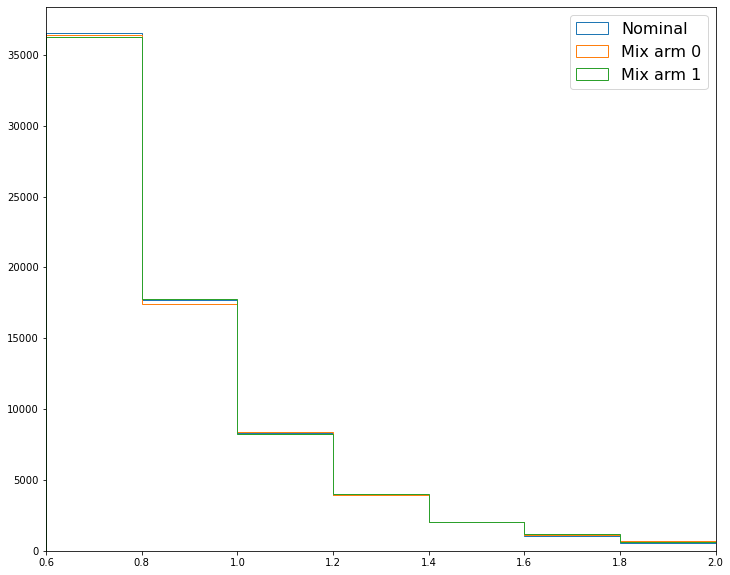

In [29]:
var__ = "R_MWW_MX"
bins__ = ( 0.6 + 0.2 * np.arange( 8 ) )
xlim__ = ( 0.6, 2. )
# var__ = "Diff_YWW_YX"
# bins__ = -0.6 + 0.4 * np.arange( 4 )
# xlim__ = ( -0.6, 0.6 )
fig = plt.figure( figsize=(12,10) )
n_events_ = df_protons_multiRP_bkg_events.shape[0]
n_events_arm0_ = df_protons_multiRP_bkg_single_arm_mixing_events_arm0.shape[0]
n_events_arm1_ = df_protons_multiRP_bkg_single_arm_mixing_events_arm1.shape[0]
norm_arm0_ = ( n_events_ / n_events_arm0_ )
norm_arm1_ = ( n_events_ / n_events_arm1_ )
plt.hist( df_protons_multiRP_bkg_events[ var__ + "_nom" ], bins=bins__, histtype='step', label='Nominal' )
plt.hist( df_protons_multiRP_bkg_single_arm_mixing_events_arm0[ var__ + "_nom" ], weights=np.full( n_events_arm0_, norm_arm0_ ), bins=bins__, histtype='step', label='Mix arm 0' )
plt.hist( df_protons_multiRP_bkg_single_arm_mixing_events_arm1[ var__ + "_nom" ], weights=np.full( n_events_arm1_, norm_arm1_ ), bins=bins__, histtype='step', label='Mix arm 1' )
plt.xlim( xlim__ )
plt.legend( loc='best', fontsize=16 )

In [8]:
np.info( pd.DataFrame.join )

 join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

Join columns of another DataFrame.

Join columns with `other` DataFrame either on index or on a key
column. Efficiently join multiple DataFrame objects by index at once by
passing a list.

Parameters
----------
other : DataFrame, Series, or list of DataFrame
    Index should be similar to one of the columns in this one. If a
    Series is passed, its name attribute must be set, and that will be
    used as the column name in the resulting joined DataFrame.
on : str, list of str, or array-like, optional
    Column or index level name(s) in the caller to join on the index
    in `other`, otherwise joins index-on-index. If multiple
    values given, the `other` DataFrame must have a MultiIndex. Can
    pass an array as the join key if it is not already contained in
    the calling DataFrame. Like an Excel VLOOKUP operation.
how : {'left', 'right', 'outer', 'inner'}, default 'left'
    How to handle the operation 

In [19]:
np.info( pd.concat )

 concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
        levels=None, names=None, verify_integrity=False, sort=False,
        copy=True)

Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis to concatenate along.
join : {'inner', 'outer'}, default 'outer'
    How to handle indexes on other axis (or axes).
ignore_index : bool, default False
    If True, 

In [31]:
np.info( pd.DataFrame.rename )

 rename(*args, **kwargs)

Alter axes labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or function transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
    Alternative to specifying axis (``mapper, axis=1``
    is equivalent to ``columns=mapper``).
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis to target with ``mapper``. Can be either the axis name
    ('index', 'columns') or number (0, 1). The default is 'index'.
copy : bool, default True
    Also copy underlying data.
inplace :